<a href="https://colab.research.google.com/github/drmsbgr/employee-attrition/blob/main/Employee_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("pavansubhasht/ibm-hr-analytics-attrition-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'ibm-hr-analytics-attrition-dataset' dataset.
Path to dataset files: /kaggle/input/ibm-hr-analytics-attrition-dataset


Veri Seti Boyutu: (1470, 35)

--- İlk 5 Satır ---


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2



--- Eksik Veri Sayısı ---
0


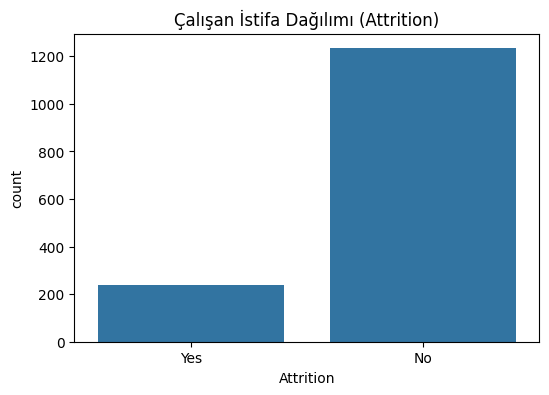

In [8]:
# Gerekli Kütüphaneleri Yükleyelim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Veriyi Yükleme (Colab'in sol panelindeki dosya simgesine tıkla ve csv dosyanı oraya sürükle)
# Dosya isminin doğru olduğundan emin ol
df = pd.read_csv(path+'/WA_Fn-UseC_-HR-Employee-Attrition.csv')

# 2. Veriye İlk Bakış
print("Veri Seti Boyutu:", df.shape)
print("\n--- İlk 5 Satır ---")
display(df.head())

# 3. Eksik Veri Kontrolü
print("\n--- Eksik Veri Sayısı ---")
print(df.isnull().sum().sum()) # IBM verisi genelde temizdir, 0 çıkması lazım.

# 4. Hedef Değişken Analizi (Attrition: Yes/No)
plt.figure(figsize=(6,4))
sns.countplot(x='Attrition', data=df)
plt.title('Çalışan İstifa Dağılımı (Attrition)')
plt.show()

Model Doğruluk Oranı: %85.71


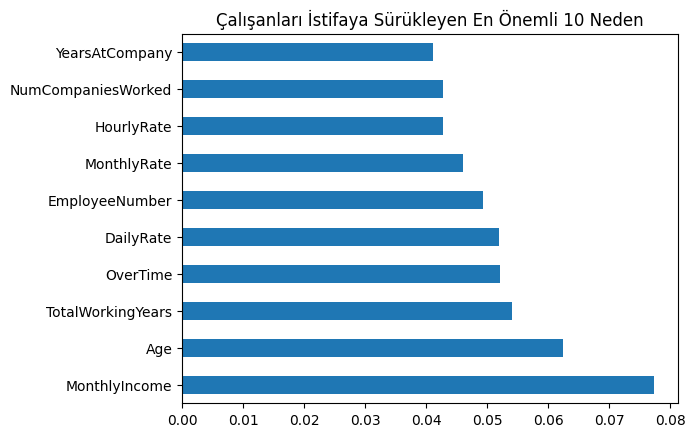

In [9]:
# --- Random Forest ile model oluşturulacak ---

# Kategorik verileri sayısal veriye çevirme (Basit yöntem)
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
    if df[column].dtype == object:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])

# Hedef ve Özelliklerin Ayrılması
X = df.drop('Attrition', axis=1) # Attrition dışındaki her şey özellik
y = df['Attrition'] # Tahmin edilecek sütun

# Eğitim ve Test Seti
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Eğitimi (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Tahmin ve Skor
score = model.score(X_test, y_test)
print(f"Model Doğruluk Oranı: %{score*100:.2f}")

# HANGİ ÖZELLİK DAHA ÖNEMLİ? (Feature Importance)
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh') # En önemli 10 nedeni çiz
plt.title("Çalışanları İstifaya Sürükleyen En Önemli 10 Neden")
plt.show()

MODEL KARŞILAŞTIRMASI

--- Model Sonuçları ---
Logistic Regression Doğruluk Oranı: %86.62
Support Vector Machine Doğruluk Oranı: %87.53
K-Nearest Neighbors Doğruluk Oranı: %87.30
Random Forest Doğruluk Oranı: %85.71


/tmp/ipython-input-2184878838.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")


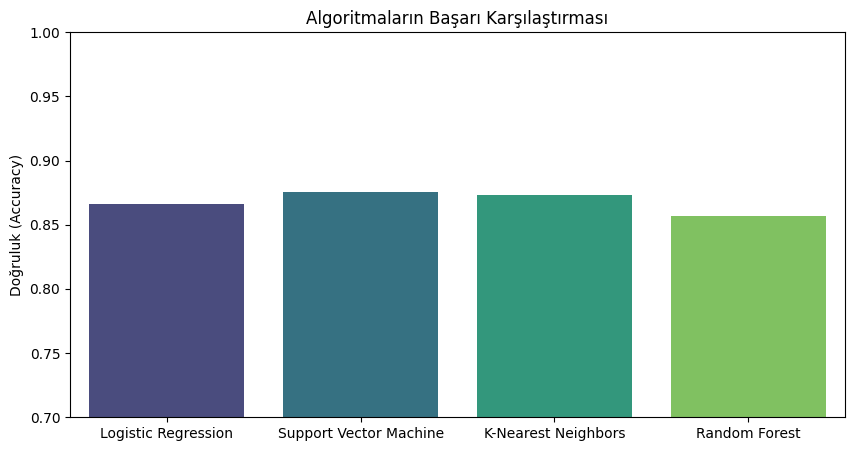

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# 1. Veri Ölçeklendirme (SVM ve KNN için şarttır)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Modelleri Tanımlama
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# 3. Döngü ile Hepsini Eğitme ve Test Etme
results = {}

print("--- Model Sonuçları ---")
for name, model in models.items():
    # Random Forest ölçeklendirme istemez ama diğerleri ister
    # Bu yüzden RF için normal, diğerleri için scaled veri kullanalım
    if name == "Random Forest":
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
    else:
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"{name} Doğruluk Oranı: %{acc*100:.2f}")

# 4. Sonuçları Görselleştirme (Hocanın en seveceği kısım)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")
plt.ylim(0.7, 1.0) # Grafiği daha detaylı görmek için Y eksenini daraltalım
plt.title("Algoritmaların Başarı Karşılaştırması")
plt.ylabel("Doğruluk (Accuracy)")
plt.show()

FRONTEND

In [ ]:
!pip install gradio

In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 1. Veriyi Tekrar Yükleyelim (Temiz başlangıç için)
df = pd.read_csv(path+'/WA_Fn-UseC_-HR-Employee-Attrition.csv')

# 2. Sadece Demo İçin Kullanacağımız Sütunları Seçelim
# (Kullanıcıdan 35 veri girmesini istememek için)
selected_columns = ['OverTime', 'MonthlyIncome', 'TotalWorkingYears', 'DistanceFromHome', 'Age', 'Attrition']
df_demo = df[selected_columns].copy()

# 3. Veriyi Sayısala Çevirelim (Manuel Mapping - Hata riskini azaltır)
# OverTime: Yes -> 1, No -> 0
# Attrition: Yes -> 1, No -> 0
df_demo['OverTime'] = df_demo['OverTime'].map({'Yes': 1, 'No': 0})
df_demo['Attrition'] = df_demo['Attrition'].map({'Yes': 1, 'No': 0})

# 4. Modeli Eğitelim
X = df_demo.drop('Attrition', axis=1)
y = df_demo['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Demo Modelimiz
demo_model = RandomForestClassifier(n_estimators=100, random_state=42)
demo_model.fit(X_train, y_train)

print("Demo modeli arayüz için hazır!")
import gradio as gr
import numpy as np

# 1. Tahmin Fonksiyonu (Arayüz burayı çağıracak)
def istifa_tahmini(fazla_mesai, maas, calisma_yili, ev_mesafesi, yas):
    # Kullanıcıdan gelen "Evet/Hayır" verisini modele uygun 1/0'a çevir
    mesai_kodu = 1 if fazla_mesai == "Evet" else 0

    # Verileri modelin istediği formata (liste içine liste) koy
    giris_verisi = [[mesai_kodu, maas, calisma_yili, ev_mesafesi, yas]]

    # Tahmin yap
    olasilik = demo_model.predict_proba(giris_verisi)[0][1] # İstifa etme ihtimali
    sonuc = demo_model.predict(giris_verisi)[0]

    # Mesaj oluştur
    risk_yuzdesi = round(olasilik * 100, 2)

    if risk_yuzdesi > 50:
        mesaj = f"⚠️ DİKKAT! Bu çalışanın istifa riski YÜKSEK. (İhtimal: %{risk_yuzdesi})"
    else:
        mesaj = f"✅ GÜVENLİ. Bu çalışan şu an memnun görünüyor. (İstifa İhtimali: %{risk_yuzdesi})"

    return mesaj

# 2. Arayüz Tasarımı (Inputlar)
arayuz = gr.Interface(
    fn=istifa_tahmini, # Yukarıdaki fonksiyonu çalıştırır
    inputs=[
        gr.Dropdown(["Evet", "Hayır"], label="Fazla Mesai Yapıyor mu? (OverTime)"),
        gr.Slider(1000, 20000, label="Aylık Gelir (MonthlyIncome)"),
        gr.Slider(0, 40, label="Toplam Çalışma Yılı (TotalWorkingYears)"),
        gr.Slider(1, 30, label="Eve Uzaklık - KM (DistanceFromHome)"),
        gr.Slider(18, 60, label="Yaşı (Age)")
    ],
    outputs="text", # Çıktı metin olacak
    title="İK Analitiği: İstifa Tahmin Sistemi",
    description="Çalışan verilerini girerek istifa riskini yapay zeka ile hesaplayın."
)

# 3. Başlat
arayuz.launch(share=True)

Demo modeli arayüz için hazır!
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://1b778e9cac933961b1.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
